# Exploratory Data Analysis on Athlete Data Version 2
*Note: The only thing that has changed is the version of the data that the csv is reading*

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [16]:
# Connect to wandb
run = wandb.init(project="mlops-datasets", job_type = "load-dataset")
art = run.use_artifact("smehta15-university-of-chicago/mlops-datasets/athletes:v2")
path = art.download()
data = pd.read_csv(f"{path}/complete.csv")
run.finish()

wandb: Downloading large artifact 'athletes:v2', 89.22MB. 4 files...
wandb:   4 of 4 files downloaded.  
Done. 00:00:00.3 (272.0MB/s)


In [17]:
print(data.head())

                region gender   age  height  weight  candj  snatch  deadlift  \
0  Southern California   Male  30.0    71.0   200.0  235.0   175.0     385.0   
1               Africa   Male  28.0    70.0   176.0  187.0   134.0     335.0   
2           North East   Male  35.0    68.0   225.0  285.0   205.0     440.0   
3        North Central   Male  36.0    71.0   199.0  267.0   212.0     485.0   
4           North East   Male  36.0    64.0   155.0  245.0   180.0     415.0   

   backsq                                                eat  \
0   315.0                      I eat whatever is convenient|   
1   254.0               I eat 1-3 full cheat meals per week|   
2   405.0  I eat quality foods but don't measure the amount|   
3   390.0  I eat quality foods but don't measure the amount|   
4   385.0                                I eat strict Paleo|   

                                          background  \
0  I played youth or high school level sports|I p...   
1    I have no athleti

In [18]:
data.describe()

,age,height,weight,candj,snatch,deadlift,backsq,total_lift
count,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000
mean,32.123847,68.871924,177.130607,205.418396,156.174198,361.933997,294.118818,1017.645409
std,7.435425,3.774937,32.399828,58.687508,48.833572,96.745441,85.081340,277.682895
min,18.000000,52.000000,5.000000,1.000000,1.000000,0.000000,1.000000,4.000000
25%,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000,805.000000
50%,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000,1040.000000
75%,37.000000,72.000000,197.000000,245.000000,190.000000,434.000000,355.000000,1224.000000
max,56.000000,83.000000,474.000000,390.000000,386.000000,1000.000000,882.000000,2135.000000


In [19]:
# Count NAs
data.isnull().sum()

region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64

In [20]:
print(data.nunique())

region          17
gender           2
age             39
height          32
weight         274
candj          296
snatch         256
deadlift       432
backsq         391
eat             40
background      35
experience      67
schedule       119
howlong         25
total_lift    1286
dtype: int64


In [21]:
def counter_plot(column, title=''):
    counter = column.value_counts()
    plt.figure(figsize=(8,6))
    plt.bar(counter.index, counter)
    plt.title(title)

In [22]:
def point_plot(x, y):
    sns.pointplot(x = x,y = y)
    plt.show()

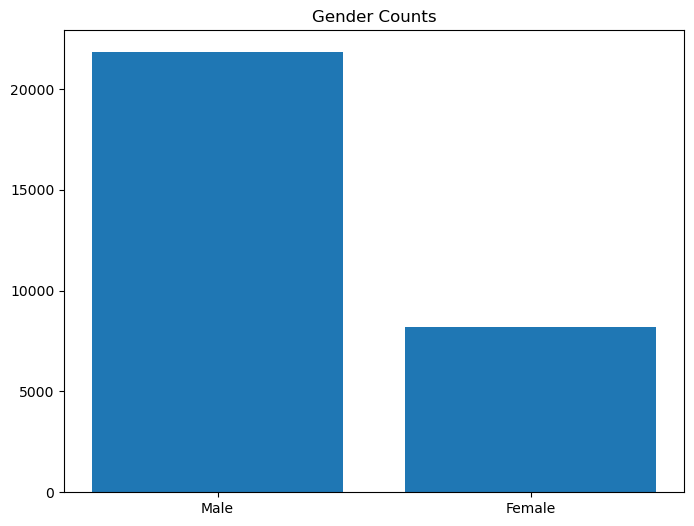

In [23]:
counter_plot(data['gender'], 'Gender Counts')

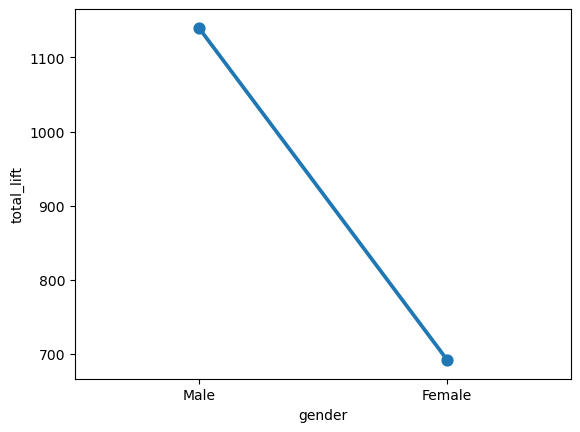

In [24]:
point_plot(data['gender'], data['total_lift'])

Text(0.5, 1.0, 'Total lift distribution')

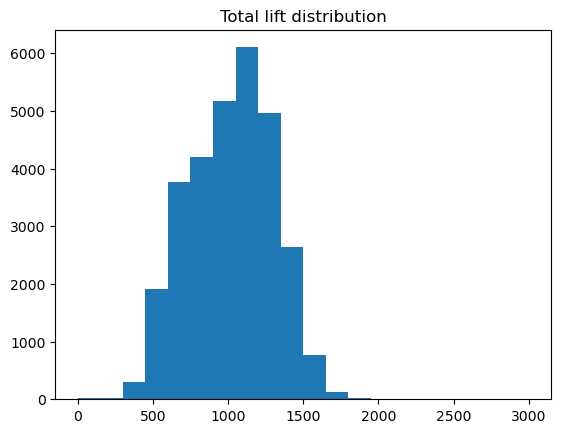

In [25]:
plt.hist(data['total_lift'], bins = 20, range=(0,3000))
plt.title('Total lift distribution')

Text(0.5, 1.0, 'Height Distribution (inches)')

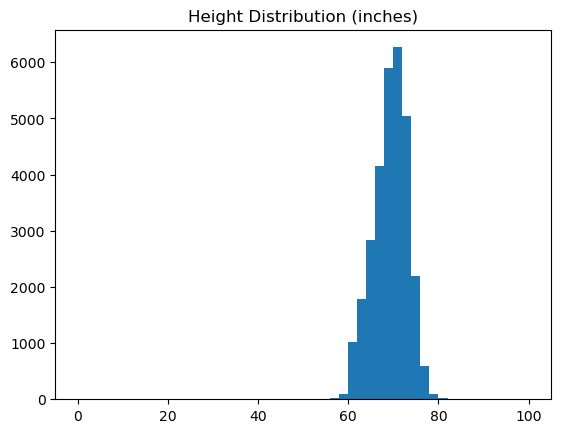

In [26]:
plt.hist(data['height'], bins = 50, range=(0,100))
plt.title('Height Distribution (inches)')

<Axes: >

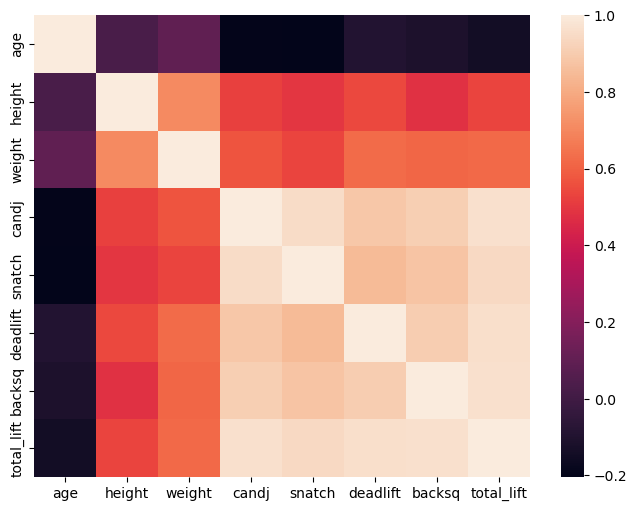

In [27]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix)

With less uncorrelated features, the height and weight appear to be more highly correlated, and the lifts are still nearly 1.